<a href="https://colab.research.google.com/github/ShounakDas101/multibody/blob/main/IEEE_Cognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random as rnd

## Pure Oscillator

In [ ]:
def physical_osc(x,t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2
    #return  [x[1], -a*np.sin(x[0]) ]
    #return  [x[1], - f*a*N*np.sin(N*x[0]) ]
    #return  [x[1], -a*np.sin(x[0]) - f*a*N*np.sin(N*x[0]) ]
    #return  [x[1], -a*np.sin(x[0])  - f*a*N*np.sin(N*x[0]) - b*x[1] ]
    return  [x[1], -a*np.sin(x[0]) - f*a*N*np.sin(N*x[0]) - b*x[1]+ c*np.sin(x[0])]

In [ ]:
def coupled_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2

    return  [x[1],  -a*np.sin(x[0]) -b*x[1] - f*a*N*np.sin(N*x[0])   ]

In [ ]:

def flip_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2
    return  [x[1], -a*np.sin(x[0]) -b*x[1] - f*a*N*np.sin(N*x[0]) + c*np.sin(x[0])]


## Flip Oscillator

In [ ]:
I=1.0
a=4.0
b=0.2
c=4.1
f=0.3  # it should be a fraction
N=8 # No of anaisotropy in the potential well = 1+N/2
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=20    # actual value 300K (at room temp)

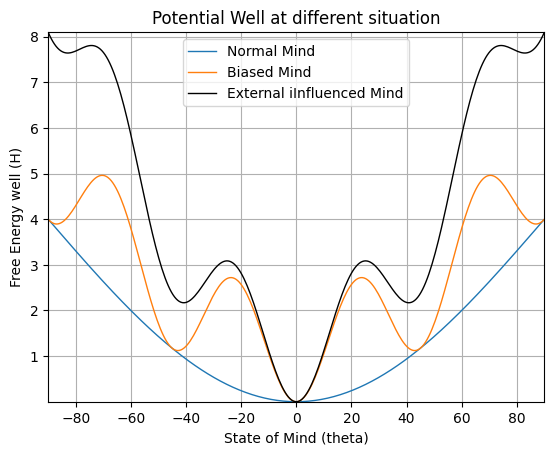

In [ ]:
# Mind Potential Equation biased because of  various brands in the market
#omega_square=a/I
t = np.arange(-np.pi/2,np.pi/2,0.01)   # start,stop,step
t_max=np.pi/2
# New Potential
H0 = a*(1-np.cos(t))
H1 = a*(1-np.cos(t)) + f*a*(1-np.cos(8*t))
H2 = a*(1-np.cos(t)) + f*a*(1-np.cos(8*t)) + c*(1-np.cos(t))

# A plot of the fluid height (position) inside the straw as a function of time.
plt.title("Potential Well at different situation")
plt.margins(x=0, y=0)
plt.ticklabel_format(style='plain', axis='x')
plt.plot(t*180/np.pi, H0, t*180/np.pi, H1, t*180/np.pi, H2, 'black', linewidth = 1)
plt.xlabel('State of Mind (theta)')
plt.ylabel('Free Energy well (H)')
plt.legend(['Normal Mind', 'Biased Mind', 'External iInfluenced Mind'])
plt.grid(True)

In [ ]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 8000
tou_0=10000 # it should be initially tou_0 > delay
delay =120
# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)  # displacement or position
velo_array = np.zeros(no_of_samples)  # velocity
enrg_array = np.zeros(no_of_samples)  # energy
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
theta = np.pi/3 -.001
omega =0
init_value =[theta, omega] # odeint takes init_value in terms of array only
init_value1=[theta, omega]
initial_energy = 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta))

print("initial_energy",initial_energy)
print("threshold energy", 0.2*initial_energy)
for i in range(0,no_of_samples,1):
    #print("outside flip loop", i-1,enrg_array[i-1])
    # check tou_0 and energy of the system
    if 2.8>enrg_array[i-1]>0 or delay > tou_0 > 0 :  # here condition should be mean_array[i]/kT <1
            #print("inside flip loop", i-1,enrg_array[i])
            #enrg_array[i]= 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta)) + c*(1-np.cos(theta))
            if 0>tou_0 > delay :
                init_value1=init_value
                print("energy", i-1, enrg_array[i-1])
            solution1 = odeint(flip_osc, init_value1, my_time)
            theta1=solution1[1,0]
            omega1=solution1[1,1]
            init_value1=[theta1, omega1]
            tou_0 = tou_0-1
            if tou_0== 0:
                init_value=init_value1


            enrg_array[i]= 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta))
            solution = odeint(coupled_osc, init_value, my_time)
            posi_array[i]=solution[1,0]
            velo_array[i]=solution[1,1]
            theta=posi_array[i]
            omega=velo_array[i]
            init_value=[theta, omega]


            #print("flip",tou_array[i])
    else:
            # Now calculate the free energy Hi
            enrg_array[i]= 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta))
            #print(enrg_array[i])
            solution = odeint(coupled_osc, init_value, my_time)
            posi_array[i]=solution[1,0]
            velo_array[i]=solution[1,1]
            theta=posi_array[i]
            omega=velo_array[i]
            init_value=[theta, omega]
            # here tou_0 should be E/kT
            tou_0 = delay
            #print("coupled" , tou_array[i])

    time_array[i]=i*1e-2



    #print (last_five_average,theta,omega)


initial_energy 3.7882039438689157
threshold energy 0.7576407887737832


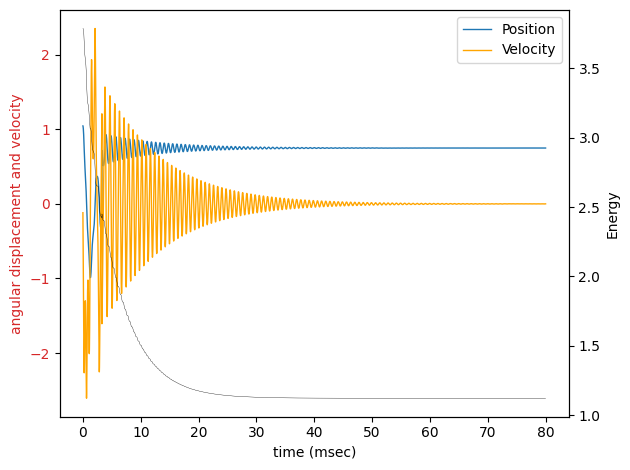

In [ ]:

from matplotlib import colors
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (msec)')
ax1.set_ylabel('angular displacement and velocity', color=color)
ax1.plot(time_array, posi_array, time_array, velo_array,  'orange', linewidth = 1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Position', 'Velocity'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color='black')  # we already handled the x-label with ax1
ax2.plot(time_array, enrg_array, color='black', linewidth = 0.25)
ax2.tick_params(axis='y', labelcolor='black')
#ax2.legend(['Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


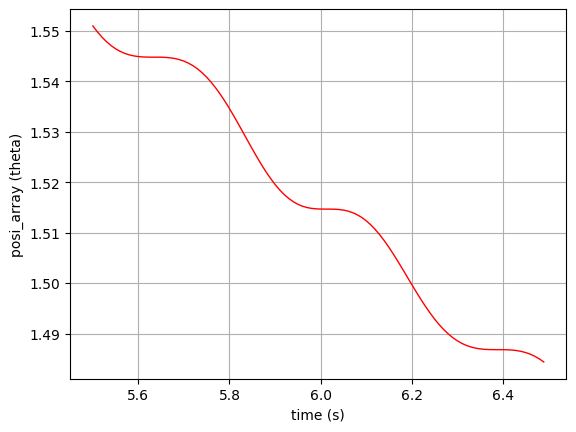

In [ ]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array[550:650], enrg_array[550:650],'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('posi_array (theta)')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.grid(True)

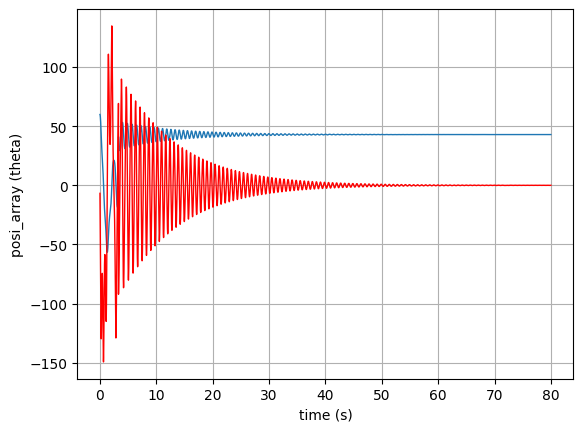

In [ ]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array[0:], 180*posi_array[0:]/np.pi,time_array[0:], 180*velo_array[0:]/np.pi,'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('posi_array (theta)')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.grid(True)

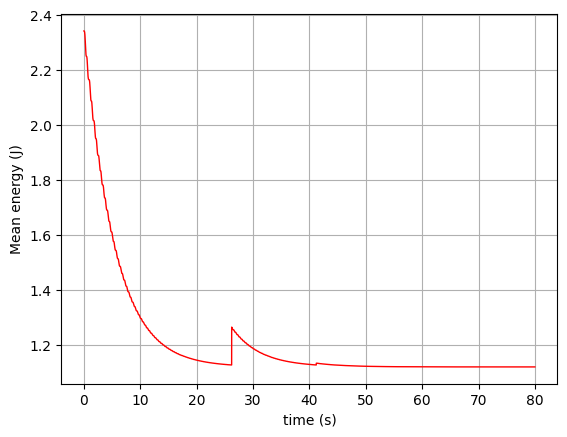

In [ ]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array[0:], enrg_array[0:],'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('Mean energy (J)')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.grid(True)